In [323]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [324]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   
import os ### using operating system dependent functionality
import scipy.stats as stats
#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [325]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx',sheet_name='Sheet1')

In [326]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [327]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [328]:
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [329]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1473 
no. of columns:  10


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [331]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [332]:
df['Contraceptive_method_used'].value_counts()

Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64

In [333]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [334]:
df.median()

Wife_age               32.0
No_of_children_born     3.0
Husband_Occupation      2.0
dtype: float64

In [335]:
data_num = df[['Wife_age','No_of_children_born','Husband_Occupation']]
data_num.head()

,Wife_age,No_of_children_born,Husband_Occupation
0,24.0,3.0,2
1,45.0,10.0,3
2,43.0,7.0,3
3,42.0,9.0,3
4,36.0,8.0,3


In [336]:
medianfiller = lambda x: x.fillna(x.median())
data_num = data_num.apply(medianfiller,axis = 0)

In [337]:
data_num.isnull().sum()

Wife_age               0
No_of_children_born    0
Husband_Occupation     0
dtype: int64

In [338]:
#Univariate Analysis

In [339]:
#Numeric

1.1078684149199645

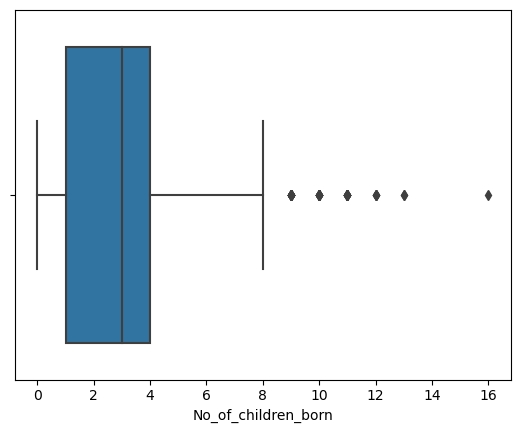

In [340]:
sns.boxplot(x='No_of_children_born',data=df)
df['No_of_children_born'].skew()

-0.09891831148427323

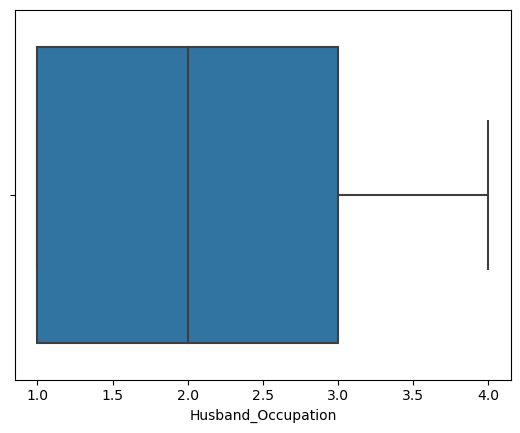

In [341]:
sns.boxplot(x='Husband_Occupation',data=df)
df['Husband_Occupation'].skew()

0.24977606280081602

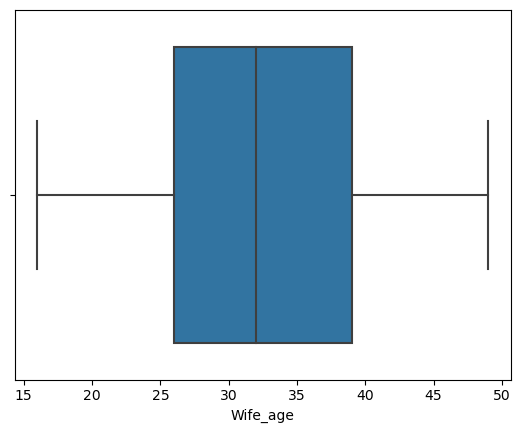

In [342]:
sns.boxplot(x='Wife_age',data=df)
df['Wife_age'].skew()

In [343]:
#Categorical

In [344]:
data_cat = df.drop(['Wife_age','Husband_Occupation','No_of_children_born'],axis=1)
data_cat.head()

,Wife_ education,Husband_education,Wife_religion,Wife_Working,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,Primary,Secondary,Scientology,No,High,Exposed,No
1,Uneducated,Secondary,Scientology,No,Very High,Exposed,No
2,Primary,Secondary,Scientology,No,Very High,Exposed,No
3,Secondary,Primary,Scientology,No,High,Exposed,No
4,Secondary,Secondary,Scientology,No,Low,Exposed,No


Wife_ education


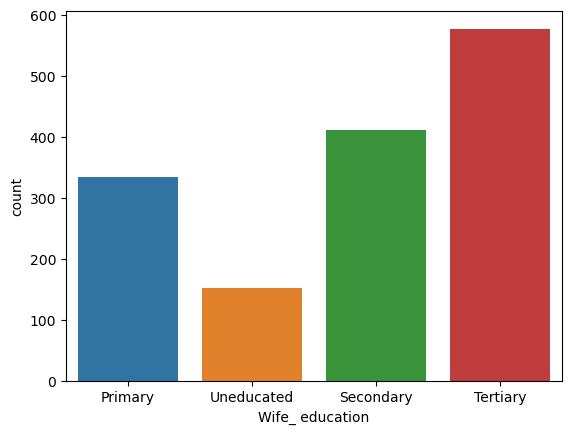

Husband_education


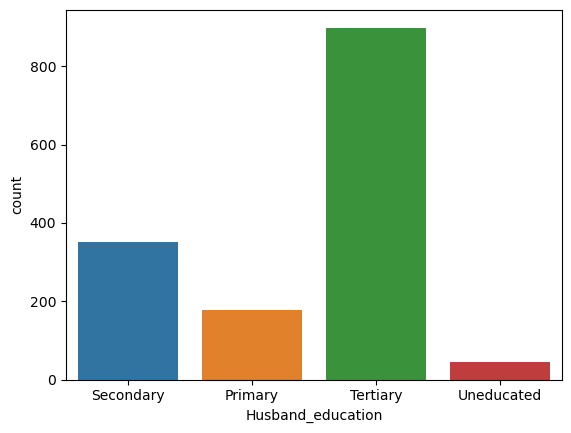

Wife_religion


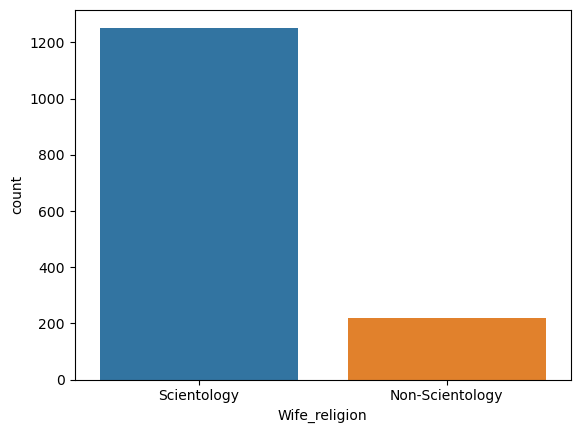

Wife_Working


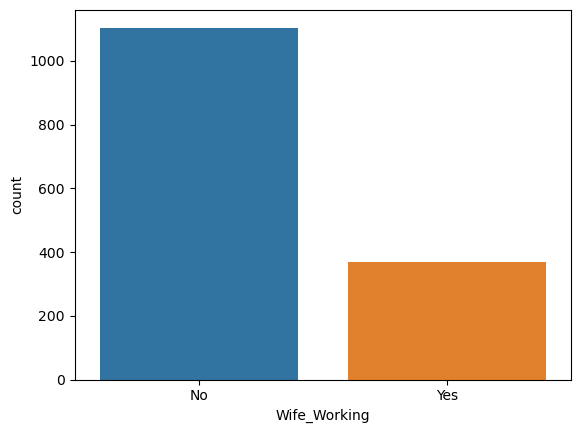

Standard_of_living_index


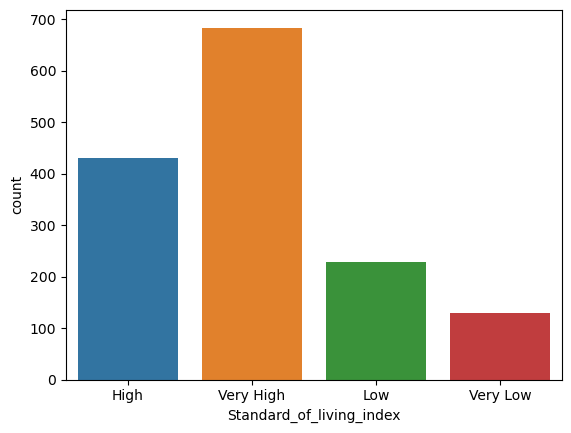

Media_exposure 


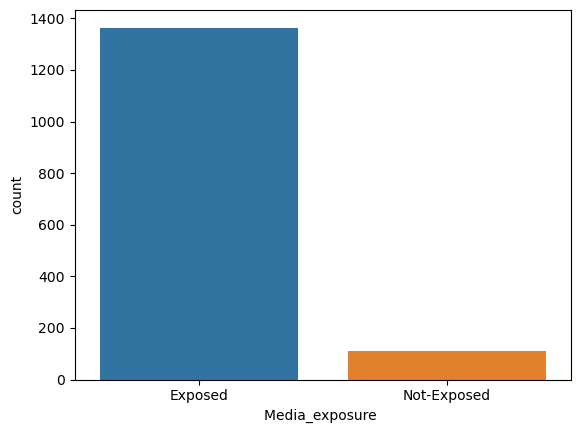

Contraceptive_method_used


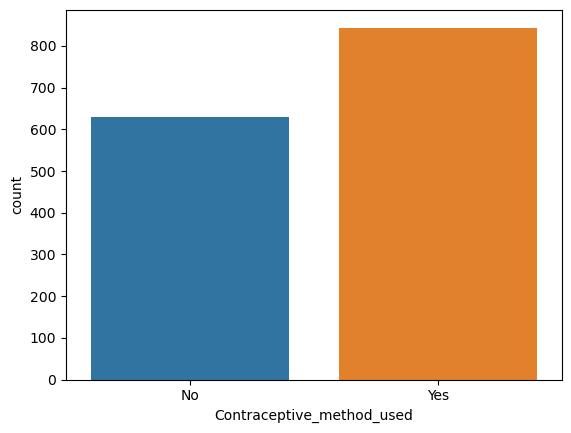

In [345]:
for col in data_cat.columns[:]:
    print(col)
    sns.countplot(x=data_cat[col])
    plt.show()

In [346]:
#bivariate

In [347]:
#Numeric vs Numeric

Text(0, 0.5, 'No_of_children_born')

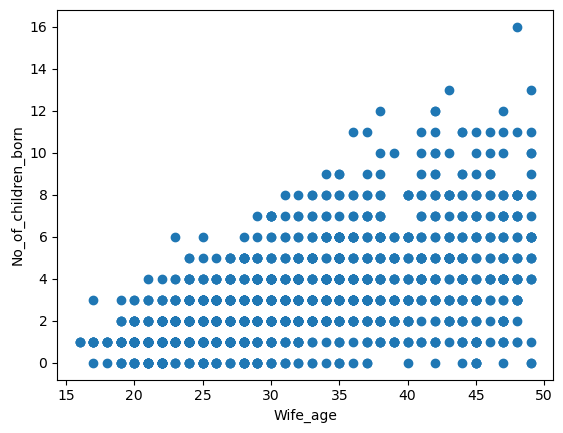

In [348]:
plt.scatter(x='Wife_age',y='No_of_children_born',data=df)
plt.xlabel('Wife_age')
plt.ylabel('No_of_children_born')

In [349]:
#Categorical vs Categorical

In [350]:
data_cat.columns

Index(['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

<AxesSubplot:xlabel='Wife_ education', ylabel='count'>

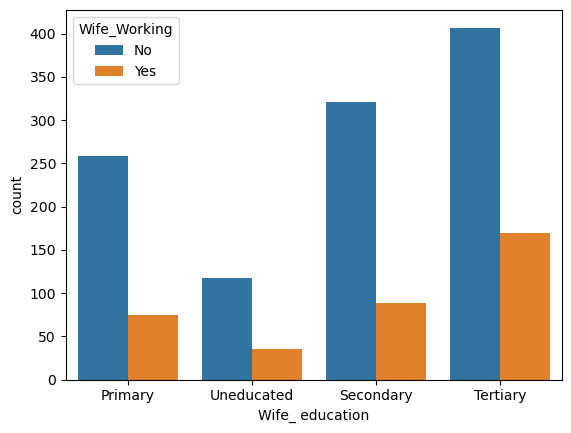

In [351]:
sns.countplot(x='Wife_ education',hue='Wife_Working',data=df)

<AxesSubplot:xlabel='Wife_ education', ylabel='count'>

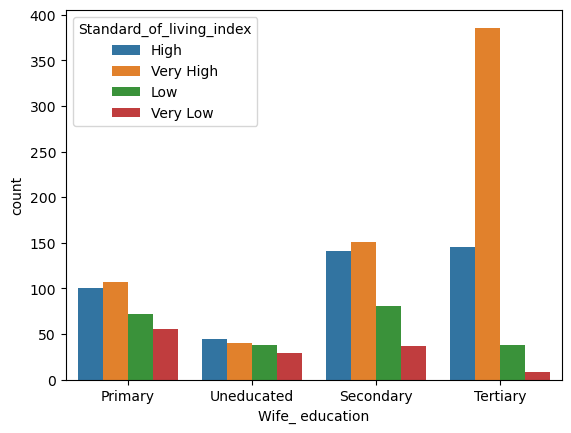

In [352]:
sns.countplot(x='Wife_ education',hue='Standard_of_living_index',data=df)

<AxesSubplot:xlabel='Husband_education', ylabel='count'>

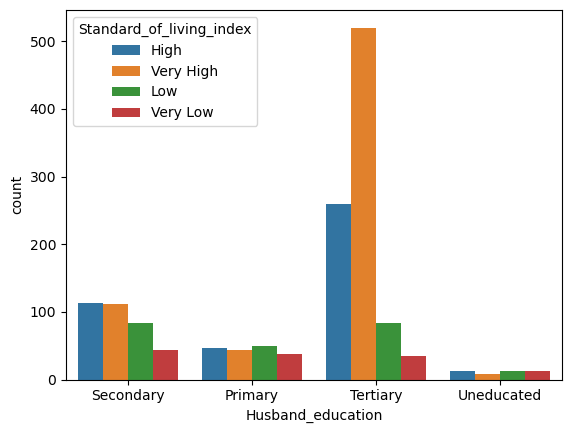

In [353]:
sns.countplot(x='Husband_education',hue='Standard_of_living_index',data=df)

<AxesSubplot:xlabel='Wife_religion', ylabel='count'>

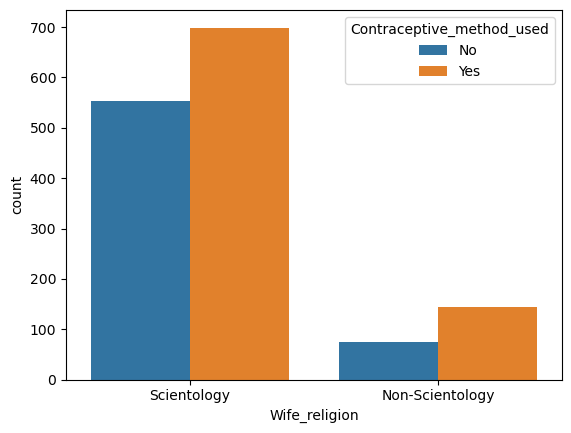

In [354]:
sns.countplot(x='Wife_religion',hue='Contraceptive_method_used',data=df)

<AxesSubplot:xlabel='Husband_education', ylabel='count'>

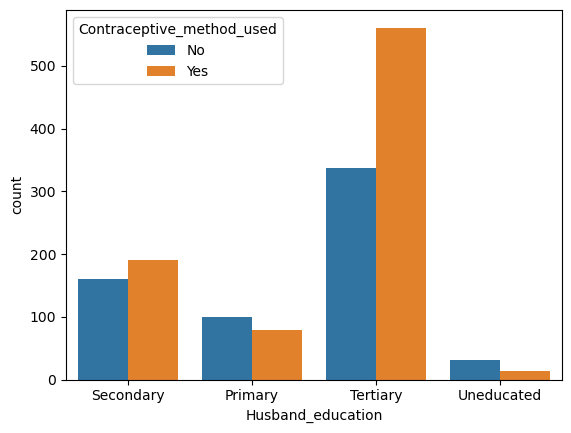

In [355]:
sns.countplot(x='Husband_education',hue='Contraceptive_method_used',data=df)

In [356]:
#Multivariate

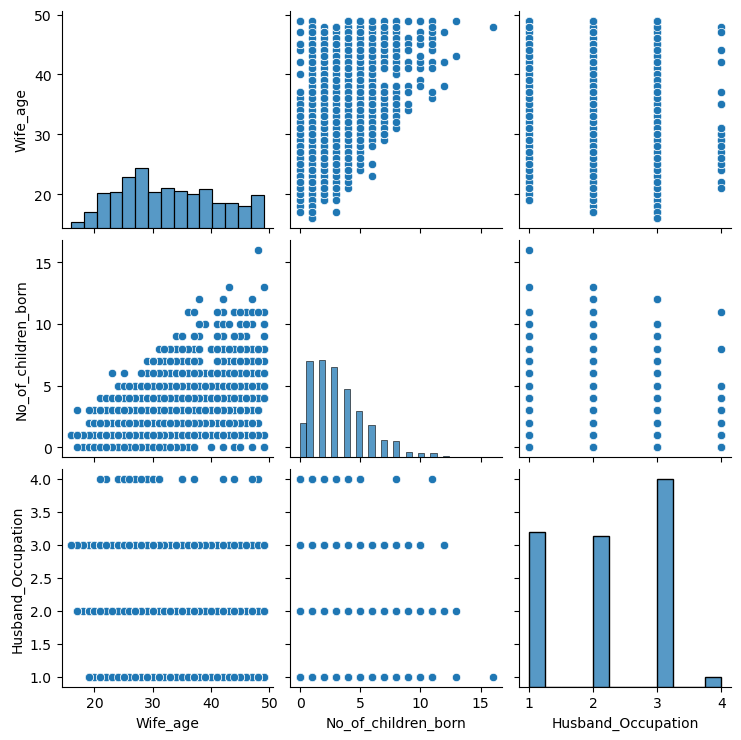

In [357]:
sns.pairplot(df)

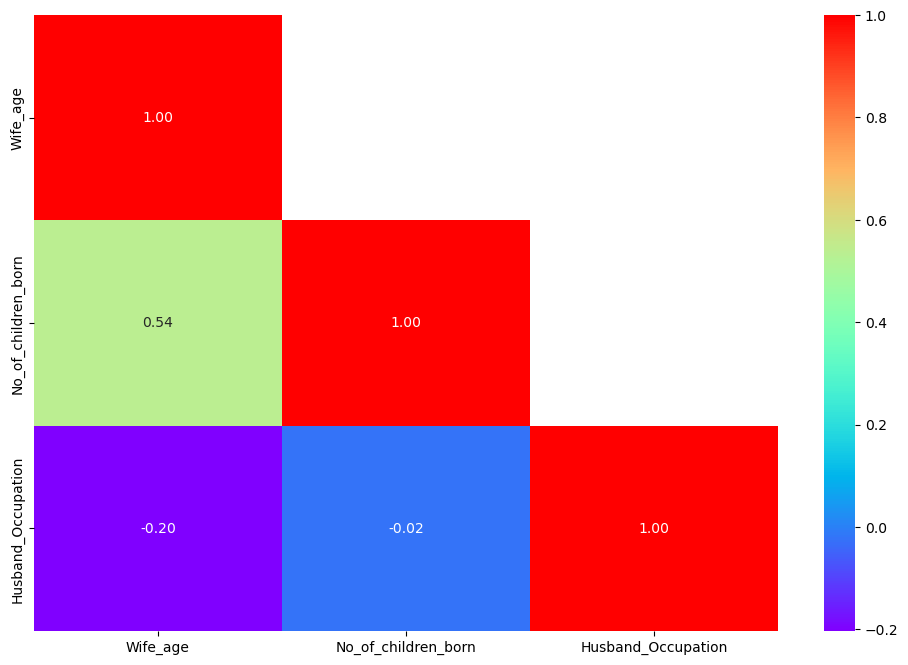

In [358]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

In [359]:
#Checking for Outliers

Wife_age
Skew: 0.27


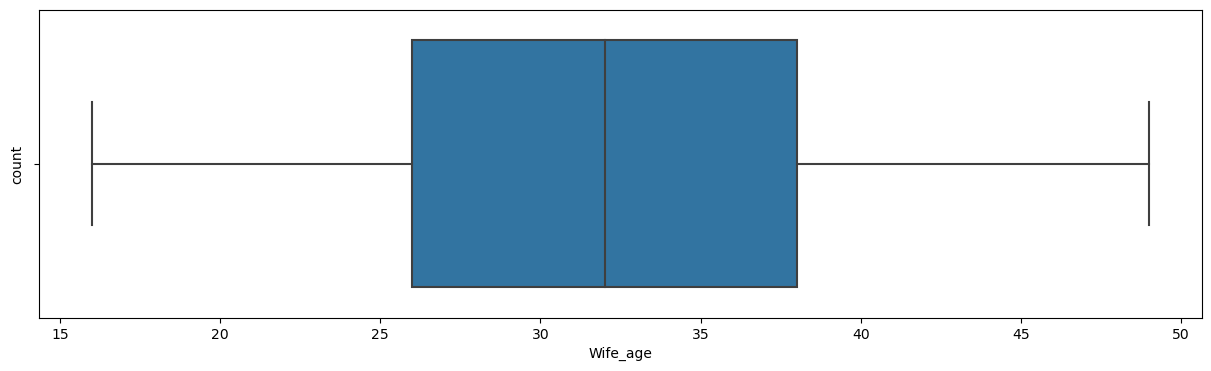

No_of_children_born
Skew: 1.12


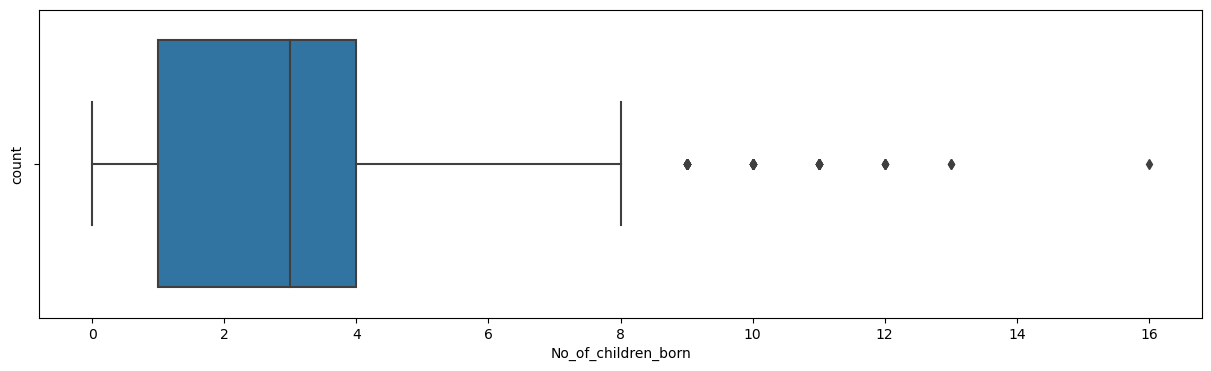

Husband_Occupation
Skew: -0.1


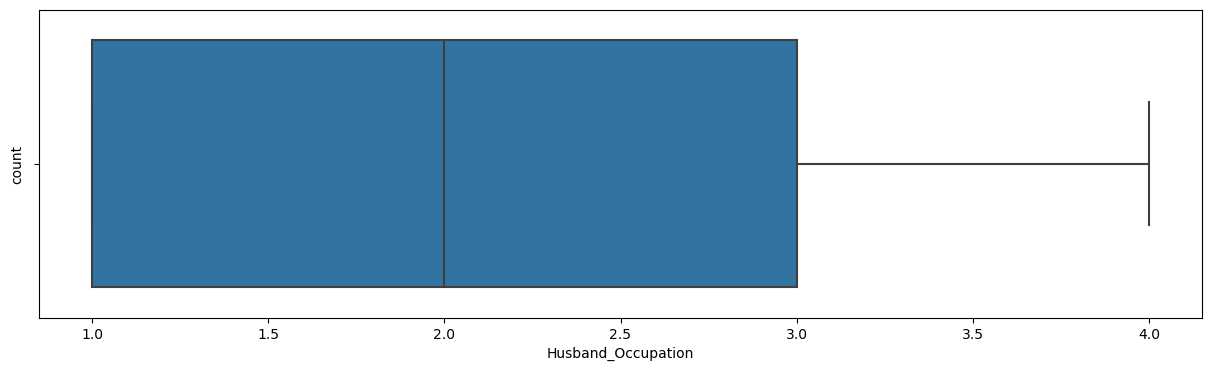

In [360]:
for col in data_num.columns[:]:
    print(col)
    print('Skew:',round(data_num[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.ylabel('count')
    sns.boxplot(x=data_num[col])
    plt.show()

In [361]:
#Treating Outliers

In [362]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 =np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 *IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [363]:
for column in data_num.columns[:]:
    lr,ur = remove_outlier(data_num[column])
    data_num[column] = np.where(data_num[column] > ur,ur,data_num[column])
    data_num[column] = np.where(data_num[column] < lr,lr,data_num[column])
    plt.show()
    print(column)

Wife_age
No_of_children_born
Husband_Occupation


Wife_age
Skew: 0.27


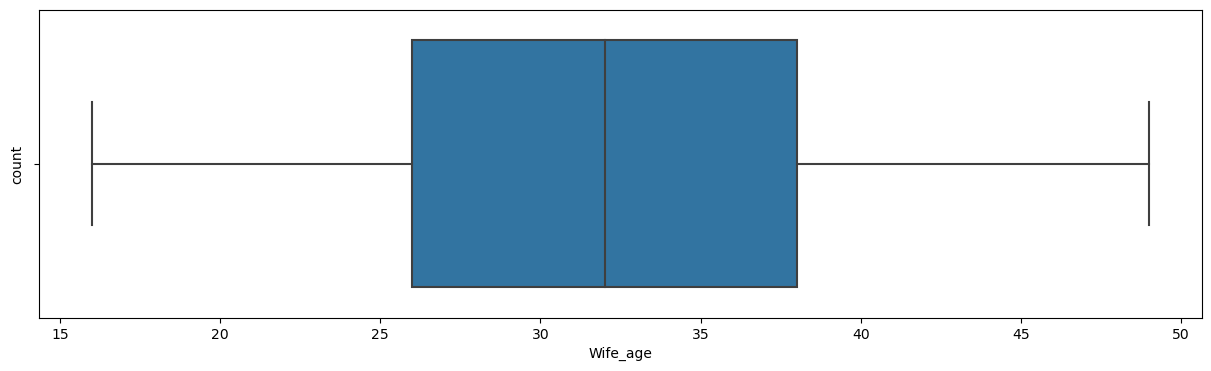

No_of_children_born
Skew: 0.71


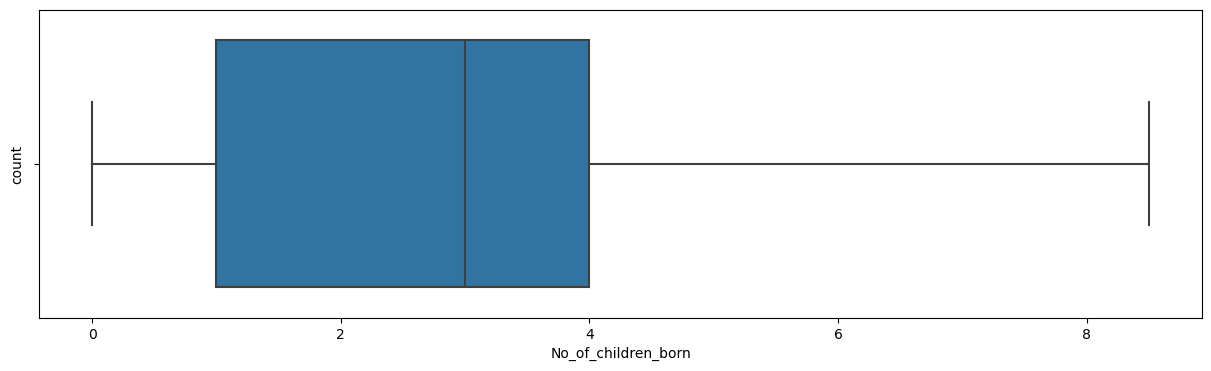

Husband_Occupation
Skew: -0.1


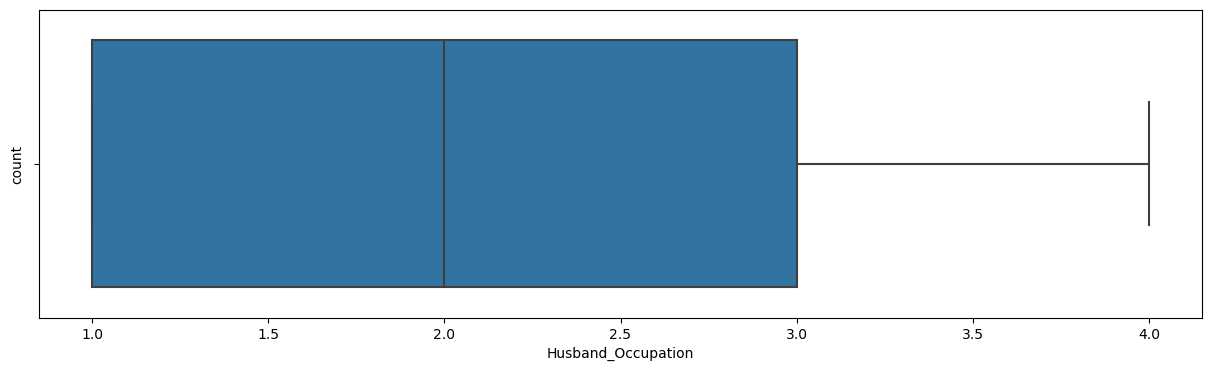

In [364]:
#checking if outliers are treated 
for col in data_num.columns[:]:
    print(col)
    print('Skew:',round(data_num[col].skew(),2))
    plt.figure(figsize = (15,4))
    plt.ylabel('count')
    sns.boxplot(x=data_num[col])
    plt.show()

In [365]:
df = pd.concat([data_num,data_cat], axis = 1, join ='inner')
df.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education,Husband_education,Wife_religion,Wife_Working,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,3.0,2.0,Primary,Secondary,Scientology,No,High,Exposed,No
1,45.0,8.5,3.0,Uneducated,Secondary,Scientology,No,Very High,Exposed,No
2,43.0,7.0,3.0,Primary,Secondary,Scientology,No,Very High,Exposed,No
3,42.0,8.5,3.0,Secondary,Primary,Scientology,No,High,Exposed,No
4,36.0,8.0,3.0,Secondary,Secondary,Scientology,No,Low,Exposed,No


In [366]:
#treating duplicate values

In [367]:
df.duplicated().sum()

85

In [368]:
df.drop_duplicates(inplace = True)

In [369]:
df.duplicated().sum()

0

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [370]:
#Encoding Data

In [371]:
df.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   No_of_children_born        1388 non-null   float64
 2   Husband_Occupation         1388 non-null   float64
 3   Wife_ education            1388 non-null   object 
 4   Husband_education          1388 non-null   object 
 5   Wife_religion              1388 non-null   object 
 6   Wife_Working               1388 non-null   object 
 7   Standard_of_living_index   1388 non-null   object 
 8   Media_exposure             1388 non-null   object 
 9   Contraceptive_method_used  1388 non-null   object 
dtypes: float64(3), object(7)
memory usage: 119.3+ KB


In [373]:
df['Contraceptive_method_used'].value_counts()

Yes    774
No     614
Name: Contraceptive_method_used, dtype: int64

In [374]:
df['Wife_ education']=np.where(df['Wife_ education'] =='Tertiary', 3, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Secondary', 2, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Primary', 1, df['Wife_ education'])
df['Wife_ education']=np.where(df['Wife_ education'] =='Uneducated', 0, df['Wife_ education'])

In [375]:
df['Husband_education']=np.where(df['Husband_education'] =='Tertiary', 3, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Secondary', 2, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Primary', 1, df['Husband_education'])
df['Husband_education']=np.where(df['Husband_education'] =='Uneducated', 0, df['Husband_education'])

In [376]:
df['Wife_religion']=np.where(df['Wife_religion'] =='Scientology', 1, df['Wife_religion'])
df['Wife_religion']=np.where(df['Wife_religion'] =='Non-Scientology', 0, df['Wife_religion'])

In [377]:
df['Wife_Working']=np.where(df['Wife_Working'] =='No', 0, df['Wife_Working'])
df['Wife_Working']=np.where(df['Wife_Working'] =='Yes', 1, df['Wife_Working'])

In [378]:
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very High', 3, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='High', 2, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Low', 1, df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='Very Low', 0, df['Standard_of_living_index'])

In [379]:
df['Media_exposure ']=np.where(df['Media_exposure '] =='Not-Exposed', 0, df['Media_exposure '])
df['Media_exposure ']=np.where(df['Media_exposure '] =='Exposed', 1, df['Media_exposure '])

In [380]:
#df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used'] =='No', 0, df['Contraceptive_method_used'])
#df['Contraceptive_method_used']=np.where(df['Contraceptive_method_used'] =='Yes', 1, df['Contraceptive_method_used'])

In [381]:
df.shape

(1388, 10)

In [382]:
df.head()

,Wife_age,No_of_children_born,Husband_Occupation,Wife_ education,Husband_education,Wife_religion,Wife_Working,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,3.0,2.0,1,2,1,0,2,1,No
1,45.0,8.5,3.0,0,2,1,0,3,1,No
2,43.0,7.0,3.0,1,2,1,0,3,1,No
3,42.0,8.5,3.0,2,1,1,0,2,1,No
4,36.0,8.0,3.0,2,2,1,0,1,1,No


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1388 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1388 non-null   float64
 1   No_of_children_born        1388 non-null   float64
 2   Husband_Occupation         1388 non-null   float64
 3   Wife_ education            1388 non-null   object 
 4   Husband_education          1388 non-null   object 
 5   Wife_religion              1388 non-null   object 
 6   Wife_Working               1388 non-null   object 
 7   Standard_of_living_index   1388 non-null   object 
 8   Media_exposure             1388 non-null   object 
 9   Contraceptive_method_used  1388 non-null   object 
dtypes: float64(3), object(7)
memory usage: 119.3+ KB


In [384]:
df.columns

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation',
       'Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

In [385]:
df['Contraceptive_method_used'].value_counts()

Yes    774
No     614
Name: Contraceptive_method_used, dtype: int64

# Logistic Regression

In [386]:
# Copy all the predictor variables into X dataframe
X = df.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
Y = df['Contraceptive_method_used']

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
type(X_train)

pandas.core.frame.DataFrame

In [388]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()
model.fit(X_train, y_train)
#predicting train and test data
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [389]:
ytest_predict_prob=model.predict_proba(X_test)
ytrain_predict_prob=model.predict_proba(X_train)

print(pd.DataFrame(ytest_predict_prob).head())
print(pd.DataFrame(ytrain_predict_prob).head())

          0         1
0  0.921740  0.078260
1  0.695577  0.304423
2  0.165680  0.834320
3  0.359961  0.640039
4  0.240988  0.759012
          0         1
0  0.243263  0.756737
1  0.568181  0.431819
2  0.334418  0.665582
3  0.192743  0.807257
4  0.741858  0.258142


# LDA

In [390]:
#Scaling the data which is a pre-requisite for LDA 
scaler=StandardScaler()
X_lda = scaler.fit_transform(df.drop(['Contraceptive_method_used'],axis=1))
Y_lda = df['Contraceptive_method_used']

In [391]:
Y_lda.value_counts()

Yes    774
No     614
Name: Contraceptive_method_used, dtype: int64

In [392]:
Y_lda.head()

0    No
1    No
2    No
3    No
4    No
Name: Contraceptive_method_used, dtype: object

In [393]:
X_train_lda,X_test_lda,y_train_lda,y_test_lda = model_selection.train_test_split(X_lda,Y_lda,test_size=0.30,
                                                                                 random_state=1)

In [394]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model_train=clf.fit(X_train_lda,y_train_lda)
model_test = clf.fit(X_test_lda,y_test_lda)

print(model_train)

LinearDiscriminantAnalysis()


Generate Coefficients and intercept for the Linear Discriminant Function¶

In [395]:
#intercept value
clf.intercept_ 

array([0.1800243])

In [396]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.57463043,  0.63501587,  0.07407832,  0.70709998, -0.04035521,
        -0.06855817, -0.05515523,  0.01621433,  0.21398157]])

In [397]:
# Training Data Class Prediction 
pred_class_train_lda = model_train.predict(X_train_lda)

# Test Data Class Prediction 
pred_class_test_lda = model_train.predict(X_test_lda)


In [398]:
# Training Data Probability Prediction
pred_prob_train_lda = model_train.predict_proba(X_train_lda)

# Test Data Probability Prediction
pred_prob_test_lda = model_train.predict_proba(X_test_lda)


# CART

In [399]:
# capture the target column ("default") into separate vectors for training set and test set

X_cart = df.drop("Contraceptive_method_used" , axis=1)

y_cart = df.pop("Contraceptive_method_used")

In [400]:
# splitting data into training and test set for independent attributes
X_train_cart, X_test_cart, train_labels_cart, test_labels_cart = train_test_split(X_cart, y_cart, test_size=.30, random_state=1)

In [401]:
print('X_train',X_train_cart.shape)
print('X_test',X_test_cart.shape)
print('train_labels',train_labels_cart.shape)
print('test_labels',test_labels_cart.shape)

X_train (971, 9)
X_test (417, 9)
train_labels (971,)
test_labels (417,)


In [402]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [403]:
# Fit the model
dt_model.fit(X_train_cart, train_labels_cart)

DecisionTreeClassifier(random_state=1)

In [404]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('desktop\df_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train_cart), 
                                class_names = list(train_char_label))

Credit_Tree_File.close()


In [405]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train_cart.columns))


                               Imp
Wife_age                  0.317579
No_of_children_born       0.238914
Husband_Occupation        0.073410
Wife_ education           0.108438
Husband_education         0.075107
Wife_religion             0.032678
Wife_Working              0.041263
Standard_of_living_index  0.095056
Media_exposure            0.017554


# Regularising the Decision Tree

In [406]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train_cart, train_labels_cart)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [407]:
credit_tree_regularized = open('desktop\df_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train_cart), 
                                class_names = list(train_char_label))

credit_tree_regularized.close()

In [408]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train_cart.columns))

                               Imp
Wife_age                  0.317579
No_of_children_born       0.238914
Husband_Occupation        0.073410
Wife_ education           0.108438
Husband_education         0.075107
Wife_religion             0.032678
Wife_Working              0.041263
Standard_of_living_index  0.095056
Media_exposure            0.017554


In [409]:
ytrain_cart_predict = reg_dt_model.predict(X_train_cart)
ytest_cart_predict = reg_dt_model.predict(X_test_cart)

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Performance Matrix :- Logistic Regression

In [410]:
#Confusion matrix -training data
print(metrics.confusion_matrix(y_train, y_predict_train))

[[221 202]
 [105 443]]


In [1]:
cm = metrics.confusion_matrix(y_train, y_predict_train)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

NameError: name 'metrics' is not defined

In [412]:
#Confusion matrix -testing data
print(metrics.confusion_matrix(y_test, y_predict_test))

[[ 91 100]
 [ 44 182]]


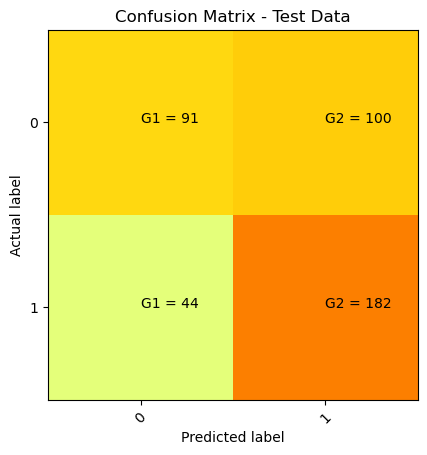

In [413]:
cm = metrics.confusion_matrix(y_test, y_predict_test)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [414]:
#for training data
print(metrics.classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

          No       0.68      0.52      0.59       423
         Yes       0.69      0.81      0.74       548

    accuracy                           0.68       971
   macro avg       0.68      0.67      0.67       971
weighted avg       0.68      0.68      0.68       971



AUC: 0.721


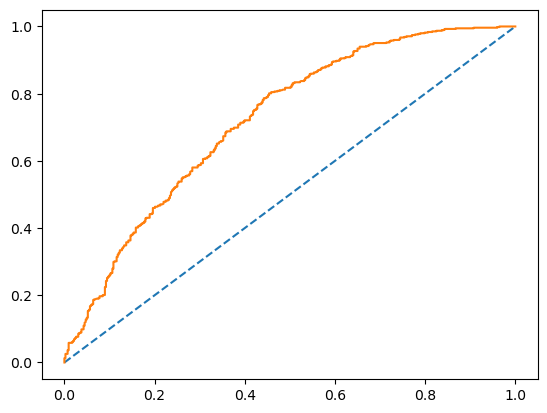

In [415]:
#for training data
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train = y_train.replace({"No":0,"Yes":1})
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [416]:
#for testing data
print(metrics.classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

          No       0.67      0.48      0.56       191
         Yes       0.65      0.81      0.72       226

    accuracy                           0.65       417
   macro avg       0.66      0.64      0.64       417
weighted avg       0.66      0.65      0.64       417



AUC: 0.690


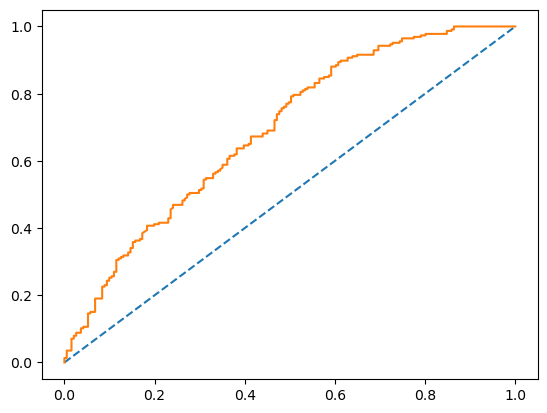

In [417]:
#for testing data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test = y_test.replace({"No":0,"Yes":1})
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Performnance Matrix LDA

In [418]:
#for training data
confusion_matrix(y_train_lda, pred_class_train_lda)

array([[273, 150],
       [221, 327]], dtype=int64)

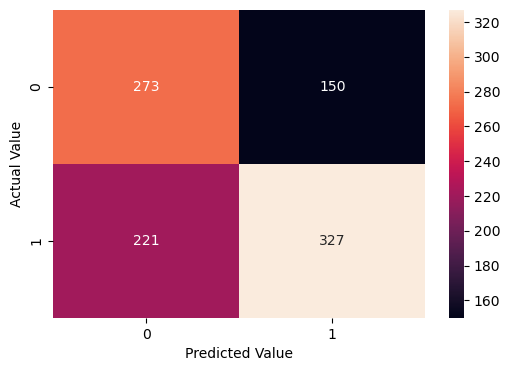

In [419]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train_lda, pred_class_train_lda),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [420]:
#for testing data
confusion_matrix(y_test_lda, pred_class_test_lda)

array([[126,  65],
       [ 88, 138]], dtype=int64)

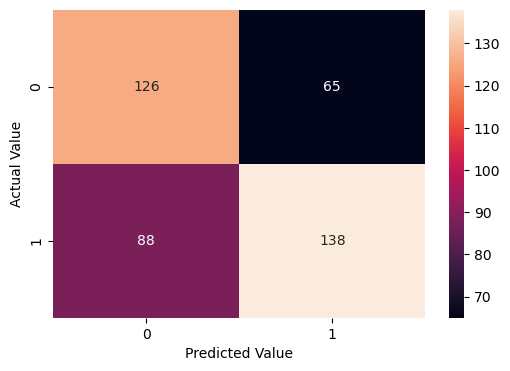

In [421]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_lda, pred_class_test_lda),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [422]:
#Training data
print(classification_report(y_train_lda, pred_class_train_lda))

              precision    recall  f1-score   support

          No       0.55      0.65      0.60       423
         Yes       0.69      0.60      0.64       548

    accuracy                           0.62       971
   macro avg       0.62      0.62      0.62       971
weighted avg       0.63      0.62      0.62       971



AUC: 0.671


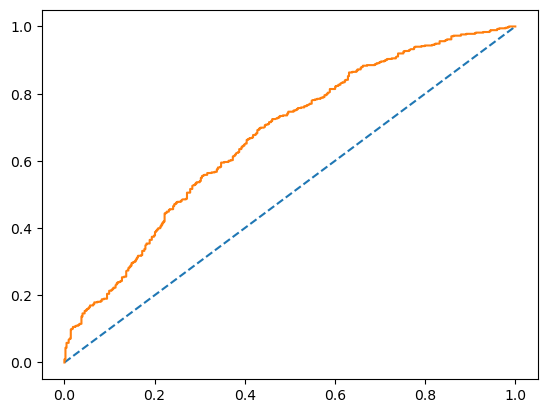

In [423]:
#for training data
# predict probabilities
probs = model.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_lda, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_train_lda = y_train_lda.replace({"No":0,"Yes":1})
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train_lda, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda);

In [424]:
#test data
print(classification_report(y_test_lda, pred_class_test_lda))

              precision    recall  f1-score   support

          No       0.59      0.66      0.62       191
         Yes       0.68      0.61      0.64       226

    accuracy                           0.63       417
   macro avg       0.63      0.64      0.63       417
weighted avg       0.64      0.63      0.63       417



AUC: 0.660


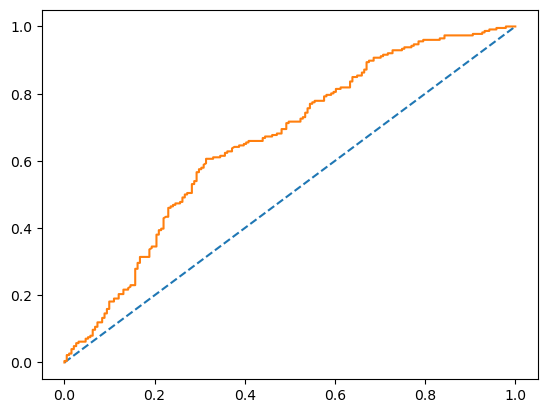

In [425]:
#for testing data
# predict probabilities
probs = model.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test_lda, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
y_test_lda = y_test_lda.replace({"No":0,"Yes":1})
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test_lda, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_lda, test_tpr_lda);

# Performance Matrix CART

In [426]:
#trainig data
confusion_matrix(train_labels_cart, ytrain_cart_predict)

array([[273, 150],
       [ 94, 454]], dtype=int64)

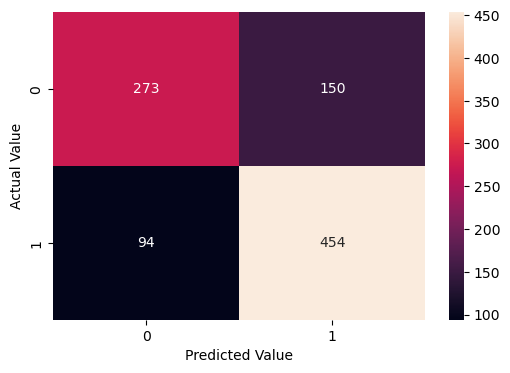

In [427]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(train_labels_cart, ytrain_cart_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [428]:
#test data
confusion_matrix(test_labels_cart, ytest_cart_predict)

array([[ 96,  95],
       [ 41, 185]], dtype=int64)

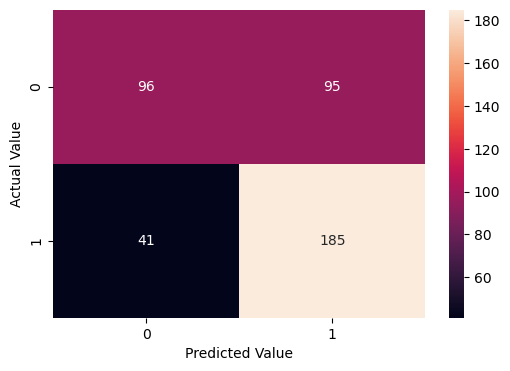

In [429]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(test_labels_cart, ytest_cart_predict),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [430]:
#training data
print(classification_report(train_labels_cart, ytrain_cart_predict))

              precision    recall  f1-score   support

          No       0.74      0.65      0.69       423
         Yes       0.75      0.83      0.79       548

    accuracy                           0.75       971
   macro avg       0.75      0.74      0.74       971
weighted avg       0.75      0.75      0.75       971



AUC: 0.823


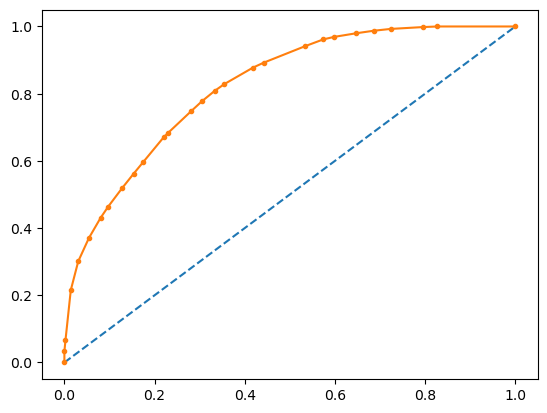

In [431]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train_cart)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels_cart, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_labels_cart = train_labels_cart.replace({"No":0,"Yes":1})
from sklearn.metrics import roc_curve
fpr_carttrain, tpr_carttrain, thresholds_carttrain = roc_curve(train_labels_cart, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_carttrain, tpr_carttrain, marker='.')
# show the plot
plt.show()

In [432]:
#testing data
print(classification_report(test_labels_cart, ytest_cart_predict))

              precision    recall  f1-score   support

          No       0.70      0.50      0.59       191
         Yes       0.66      0.82      0.73       226

    accuracy                           0.67       417
   macro avg       0.68      0.66      0.66       417
weighted avg       0.68      0.67      0.66       417



AUC: 0.742


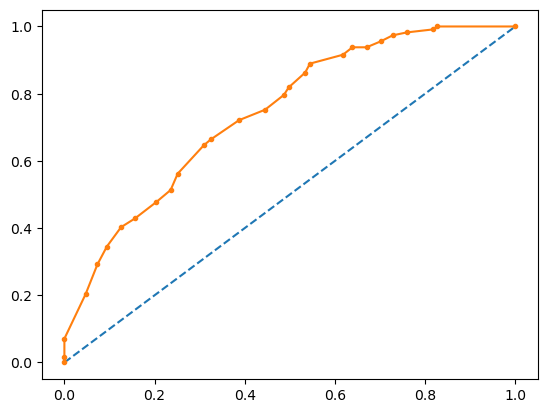

In [433]:
# AUC and ROC for the testing data

# predict probabilities
probs = reg_dt_model.predict_proba(X_test_cart)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels_cart, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_labels_cart = test_labels_cart.replace({"No":0,"Yes":1})
from sklearn.metrics import roc_curve
fpr_carttest, tpr_carttest, thresholds_carttest = roc_curve(test_labels_cart, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_carttest, tpr_carttest, marker='.')
# show the plot
plt.show()